In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

#For Evaluating models.
import eli5
from eli5.sklearn import PermutationImportance
from scipy.stats import chi2_contingency, ttest_ind


In [2]:
#import processed data
combined = pd.read_csv('~/Documents/GitHub/medicare-fraud-detection/data/processed/combined.csv', low_memory=False)
partb = pd.read_csv('~/Documents/GitHub/medicare-fraud-detection/data/processed/partb.csv', low_memory=False)
partd = pd.read_csv('~/Documents/GitHub/medicare-fraud-detection/data/processed/partd.csv', low_memory=False)

In [3]:
#making targets binary
partb.TARGET = partb.TARGET.map({'FRAUD': 1, 'NOT_FRAUD': 0}).astype(int)
partd.TARGET = partd.TARGET.map({'FRAUD': 1, 'NOT_FRAUD': 0}).astype(int)
combined.TARGET = combined.TARGET.map({'FRAUD': 1, 'NOT_FRAUD': 0}).astype(int)

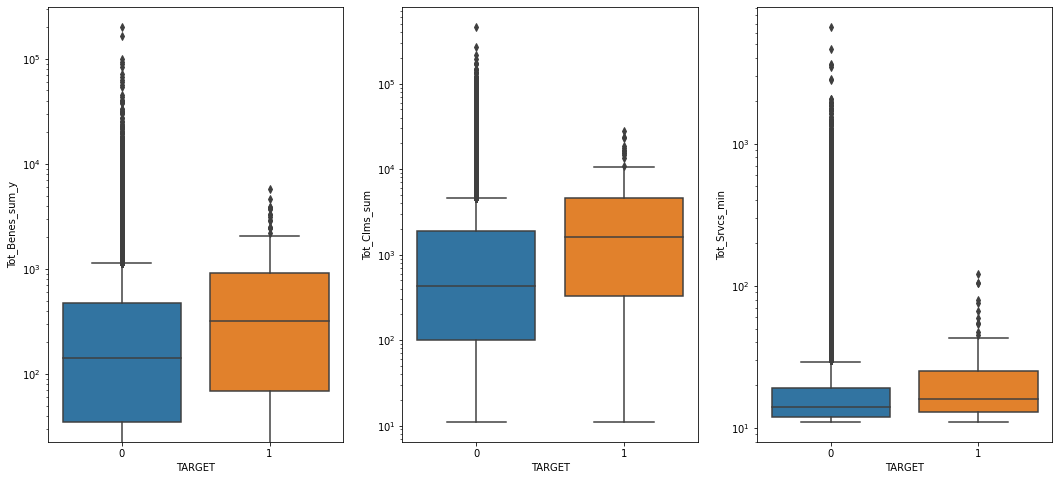

In [46]:
#examine the 3 most important features in random forest model, which performs well for fraud cases
fig, ax=plt.subplots(1,3, figsize=(18,8))
sns.boxplot(y='Tot_Benes_sum_y', x='TARGET', data= combined, ax=ax[0]).set_yscale('log')
#sns.boxplot(y='Avg_Mdcr_Pymt_Amt_max', x ='TARGET', data = combined, ax=ax[1]).set_yscale('log')
sns.boxplot(y='Tot_Clms_sum', x='TARGET', data= combined, ax=ax[1]).set_yscale('log')
sns.boxplot(y='Tot_Srvcs_min', x='TARGET', data= combined, ax=ax[2]).set_yscale('log')

In [32]:
#run t test on Tot_Benes_sum_y
a=combined[combined['TARGET']==0]['Tot_Benes_sum_y']
b=combined[combined['TARGET']==1]['Tot_Benes_sum_y']
T , p = ttest_ind(a,b)
print(p)

9.42305241684886e-06


In [33]:
a=combined[combined['TARGET']==0]['Avg_Mdcr_Pymt_Amt_max']
b=combined[combined['TARGET']==1]['Avg_Mdcr_Pymt_Amt_max']
T , p = ttest_ind(a,b)
print(p)

8.523779054774634e-05


In [34]:
a=combined[combined['TARGET']==0]['Tot_Clms_sum']
b=combined[combined['TARGET']==1]['Tot_Clms_sum']
T , p = ttest_ind(a,b)
print(p)

1.2942877091611363e-09


These p values are very small, which supports the idea that using Tot_Benes_sum_y as a factor to detect fraud

In [29]:
#investigate Rndrng_Prvdr_Gndr_M
print(pd.crosstab(combined['Rndrng_Prvdr_Gndr_M'], combined['TARGET']))

TARGET                    0    1
Rndrng_Prvdr_Gndr_M             
0                    287559   26
1                    367188  118


In [ ]:
#list of most important features from the models
#Tot_30day_Fills_min, Tot_Day_Suply_std, Tot_30day_Fills_median, Tot_Benes_sum_y, Avg_Mdcr_Pymt_Amt_max, Tot_Clms_sum

<AxesSubplot:>

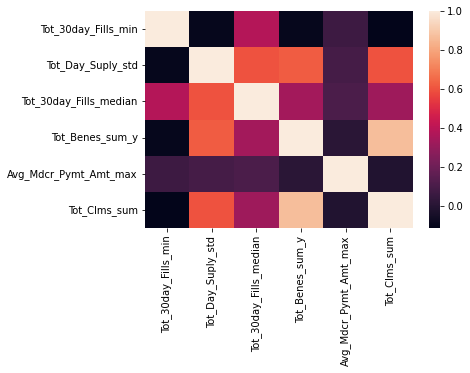

In [37]:
#relationship between important features
feat_imp = combined[['Tot_30day_Fills_min', 'Tot_Day_Suply_std', 'Tot_30day_Fills_median', 'Tot_Benes_sum_y', 'Avg_Mdcr_Pymt_Amt_max', 'Tot_Clms_sum']]
sns.heatmap(feat_imp.corr())